In [1]:
import os
import glob
import pandas as pd

In [2]:
dfs = []
tetrad_images_dir = os.path.join(os.getcwd(), '..', 'data', '9var')
for d in glob.glob(tetrad_images_dir + os.sep + "*.txt"):
    print (d)
    df = pd.read_table(d, sep="\t")
    dfs.append(df)

/home/jovyan/py-causal/example/../data/9var/sub001.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub016.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub014.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub010.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub013.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub017.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub005.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub009.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub004.cent-table.9.dat.txt


In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listIndTests()

bdeu-test
cci-test
cg-lr-test
chi-square-test
d-sep-test
disc-bic-test
fisher-z-test
g-square-test
kci-test
mnlrlr-test
mvplr-test
prob-test


In [5]:
tetrad.getAlgorithmParameters(algoId = 'imgs_cont', testId = 'fisher-z-test')

faithfulnessAssumed: This is a parameter for FGES (“Fast GES”). If this is set to ‘Yes’, it will be assumed that if X _||_ Y, by an independence test, then X _||_ Y | Z for nonempty Z. If the model is faithful to the data, this will necessarily be the case. However, there are some non-faithful examples one can propose where this is not the case. If one is worried about this kind of unfaithfulness, one should set this parameter to ‘No’. If one is willing to tolerate this kind of unfaithfulness, then setting this parameter to ‘Yes’ leads to significantly faster searches. (java.lang.Boolean) [default:true]
symmetricFirstStep: For discrete searches, and in some other situations, it may make a difference for an edge X—Y whether you score X->Y or X<-Y, even though theoretically they should have the same score. If this parameter is set to “Yes”, both scores will be calculated and the higher score used. (Recall we are calculating BIC as 2L – c k ln N, where c is the penalty discount.) (java.la

In [6]:
tetrad.run(algoId = 'imgs_cont', dfs = dfs, testId = 'fisher-z-test', verbose = True)

In [7]:
tetrad.getNodes()

['LOCC', 'LACC', 'LIFG', 'LIPL', 'ROCC', 'RACC', 'RIFG', 'RIPL', 'I']

In [8]:
tetrad.getEdges()

['LIPL --> RIPL',
 'RIPL --> RIFG',
 'LIPL --> LACC',
 'LOCC --- ROCC',
 'RIFG --> RACC',
 'LACC --> RACC',
 'RIPL --> RACC',
 'LOCC --- I',
 'LIPL --> LIFG',
 'LACC --> LIFG',
 'LIPL --- LOCC',
 'LIFG --> RIFG',
 'ROCC --> RIPL',
 'I --> LACC',
 'LOCC --> LACC']

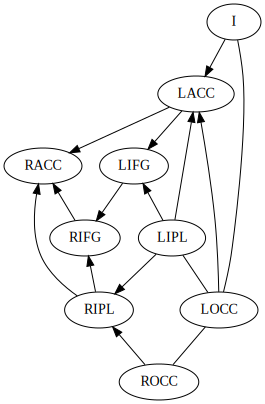

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [10]:
tetradGraph = tetrad.getTetradGraph()
lofs = s.lofs(tetradGraph, dfs, dataType = 0, rule = 'RSkewE', score = 'entropy')

In [11]:
lofs.getEdges()

['RIPL --> LIPL',
 'RIPL --> RIFG',
 'LACC --> LIPL',
 'ROCC --> LOCC',
 'RACC --> RIFG',
 'RACC --> LACC',
 'RACC --> RIPL',
 'I --> LOCC',
 'LIPL --> LIFG',
 'LIFG --> LACC',
 'LIPL --> LOCC',
 'LIFG --> RIFG',
 'RIPL --> ROCC',
 'LACC --> I',
 'LACC --> LOCC']

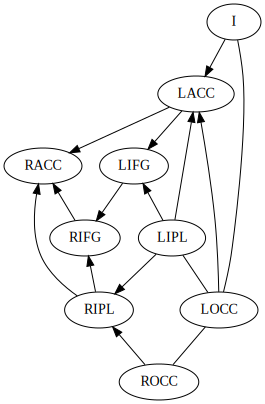

In [12]:
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [13]:
pc.stop_vm()